Steam Store Games - Data Mining
======
##### Equipe (The Boys):
1. Nicolas Soares - 399048
2. Rebecca Maia - 
3. Klayver Paz -
4. Breno Alef - 474528
------

# Conjunto de Dados Escolhido

Para o desenvolvimento deste trabalho, a equipe decidiu trabalhar com dados sobre os jogos publicados na loja do Steam. Para obtenção dessas informações, foi utilizada a plataforma Kaggle, uma comunidade online de cientistas de dados onde são postados diversos conjuntos para estudo e o escolhido foi o [Steam Store Games (Clean dataset)](https://www.kaggle.com/nikdavis/steam-store-games/data?select=steam.csv).

## Bibliotecas Utilizadas

Ao longo deste trabalho, as seguintes bibliotecas foram utilizadas:
*   __Pandas:__ Leitura dos arquivos .csv com os dados e para a manipulação dos dataframes. Pode ser instalado com o comando `conda install pandas`

*   __Matplotlib:__ Visualização dos dados em gráficos. Pode ser instalado com o comando `conda install -c conda-forge matplotlib`

*   __Seaborn:__ Baseado no matplotlib e utilizado para facilitar a construção de alguns gráficos Pode ser instalado com o comando `conda install seaborn`

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Leitura do Conjunto de Dados

In [179]:
df_games = pd.read_csv("steam.csv", sep=",", engine='python')
df_game_tags = pd.read_csv("steamspy_tag_data.csv", sep=",", engine='python')
df_game_req = pd.read_csv("steam_requirements_data.csv", sep=",", engine='python')
df_games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## Pré-processamento dos dados 

### 1.Para isso, lemos as colunas de cada Dataset separadamente 

In [180]:
print("df_games: ", df_games.columns)
print("df_game_req: ", df_game_req.columns)
print("df_game_tags: ", df_game_tags.columns)

df_games:  Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')
df_game_req:  Index(['steam_appid', 'pc_requirements', 'mac_requirements',
       'linux_requirements', 'minimum', 'recommended'],
      dtype='object')
df_game_tags:  Index(['appid', '1980s', '1990s', '2.5d', '2d', '2d_fighter', '360_video',
       '3d', '3d_platformer', '3d_vision',
       ...
       'warhammer_40k', 'web_publishing', 'werewolves', 'western', 'word_game',
       'world_war_i', 'world_war_ii', 'wrestling', 'zombies', 'e_sports'],
      dtype='object', length=372)


In [185]:
df_games['release_date'] = pd.to_datetime(df_games['release_date'])

### 2. Merging Datasets
A partir dessa análise observamos que podemos juntar os Datasets (data e df_game_Req) em um Dataset só, entretando o df_games_tags trata-se de uma distribuição muito maior de features e portanto, deve ser analisado separadamente.

In [165]:
print('Appids em DATA:',df_games.appid.nunique())
print('Appids em DF_GAME_REQ:', df_game_req.steam_appid.nunique())
print("Quantidade de games que DATA que estão no DF_GAME_REQ:",len(data.appid.isin(df_game_req.steam_appid.unique())))

Appids em DATA: 27075
Appids em DF_GAME_REQ: 27319
Quantidade de games que DATA que estão no DF_GAME_REQ: 27075


Com isso, concluimos que 100% dos games apresentados em data estão em df_game_req, por tanto, vamos juntar os dataframes a partir do mesmo atributo "Appid" e cortar os 244 dados incompletos.

In [186]:
df_game_req = df_game_req.rename(columns={'steam_appid':'appid'})
games = pd.merge(df_games,df_game_req)
games = games[:27075]

In [187]:
games.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,negative_ratings,average_playtime,median_playtime,owners,price,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3339,17612,317,10000000-20000000,7.19,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,633,277,62,5000000-10000000,3.99,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [168]:
games.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum',
       'recommended'],
      dtype='object')

### 3. Avaliação da limpeza do dataset GAMES (presença de valores nulos)

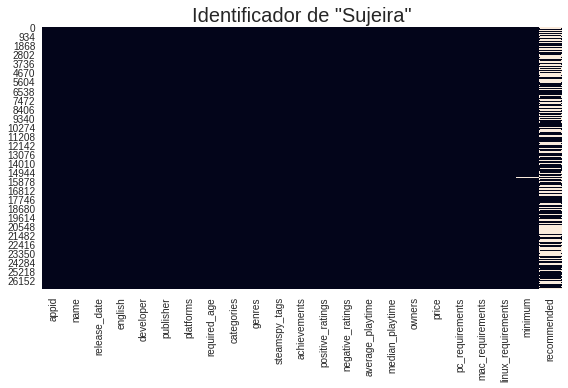

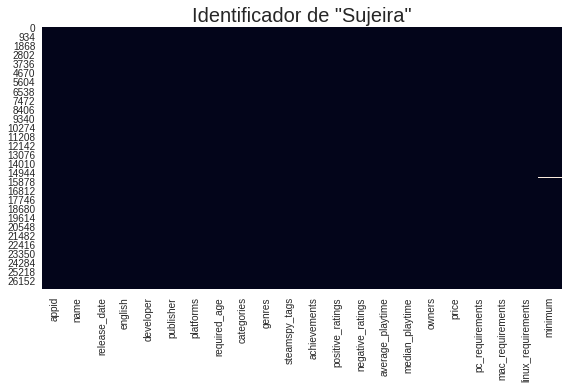

In [169]:
# Verificação se há  algum valor nulo seria denotado de branco na figura abaixo - feature Recommended !!
def sujo(data):
    plt.style.use("seaborn")
    sns.heatmap(data.isnull(), cbar =  False)
    plt.title('Identificador de "Sujeira"',fontsize=20)
    plt.tight_layout()
    plt.show()
    
sujo(games)
#Uma possível solução seria ignorar completamente a coluna de Recomendação. - Tudo ok!!
games = games.drop('recommended',axis=1)
sujo(games)


# Análises
Nesta seção se concentram as análises realizadas nos dados do conjunto.

## Visão Geral
Iniciamos a análise com uma visão geral sobre as entradas do dataset.

### Datas
Quando se trata de uma loja online como a do Steam, uma informação interessante de se obter é analisar quando os jogos foram lançados. 

#### Lançamentos por mês
Podemos iniciar verificando se há alguma diferença significativa em relação ao mês do ano do lançamento.

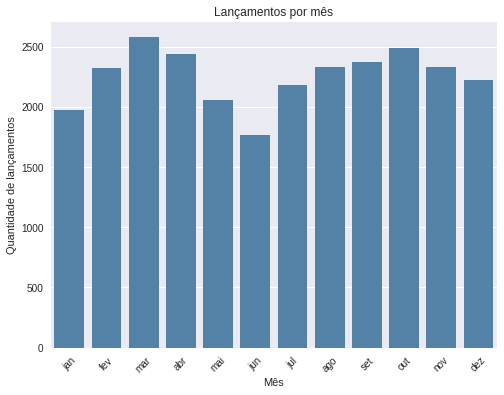

In [209]:
by_month = games.groupby(games.release_date.dt.month.rename('release_month'))\
    .agg('count').appid.rename('count')

months = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

plt.figure(figsize=(8,6))

g = sns.barplot(x=by_month.index, y=by_month, color="SteelBlue")
g.set_xticklabels(months)
plt.xticks(rotation=45)
plt.title('Lançamentos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de lançamentos')
plt.show()

Olhando para o gráfico que exibe a quantidade total de lançamentos po mês, pode-se observar que o mês mais forte no geral foi fevereiro e o mais fraco foi junho. Apesar do período de férias no meio do ano, não se observa um pico muito grande de lançamentos nesse período, apresentando uma queda notável em relação aos demais meses. A maior concentração tende para o meio dos semestres. 

#### Lançamentos por ano
Além dos meses, podemos verificar também os anos de lançamento e verificar a variação ao longo do tempo.

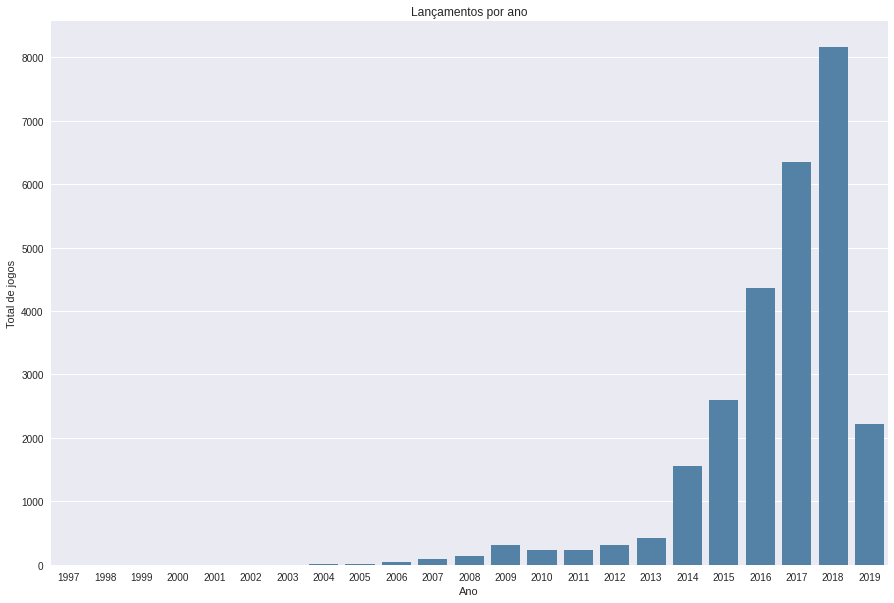

In [207]:
by_year = games.groupby(games.release_date.dt.year.rename('release_year'))\
    .agg('count').appid.rename('count')

plt.figure(figsize=(15,10))

sns.barplot(y=by_year, x=by_year.index, color='SteelBlue')
plt.title('Lançamentos por ano')
plt.xlabel('Ano')
plt.ylabel('Total de jogos')
plt.show()

Analisando o gráfico, percebe-se que inicia com valores baixos até que passa a crescer exponencialmente após 2012. Olhando para a história da plataforma, isso se explica pelo fato de que, até o lançamento do Steam Greelight em 2012, o Steam publicava apenas jogos da Valve, de grandes empresas ou de parceiras. A mudança possibilitou que desenvolvedores menores pudessem submeter seus jogos para serem submetidos a uma votação de escolha das novas adições à loja. O crescimento é exibido até o ano de 2019, onde a quantidade de registros no conjunto de dados é limitada devido ao momento de sua obtenção.

### Suporte à língua inglesa
Uma das informações que o conjunto de dados traz é a do suporte para inglês. Apesar de ser uma plataforma internacional, o Steam não possui qualquer limitação que obrigue o publicante a traduzir o seu jogo para um idioma específico. Considerando isso, podemos nos perguntar qual a cobertura da língua inglesa no catálogo.

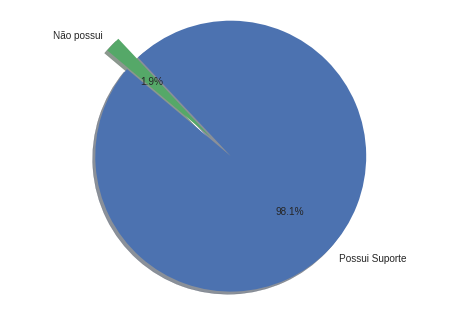

In [150]:
labels = ['Possui Suporte', 'Não possui']
sizes = games.english.value_counts()
explode = (0, 0.2)

plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Como esperado de uma loja disponível em diversos países pelo mundo, a maioria dos jogos do catálogo possui suporte para a língua inglesa, com apenas 1.9% deficientes de uma tradução para essa língua franca.

### Classificação Indicativa
Uma coisa que podemos verificar é a distribuição das classificações indicatívas na loja, analisando a quantidade de jogos restritos ou livres para todas as idades. Isso pode nos dar uma ideia de quão amigáveis para toda a família ou explícitos são considerados os jogos publicados no Steam.

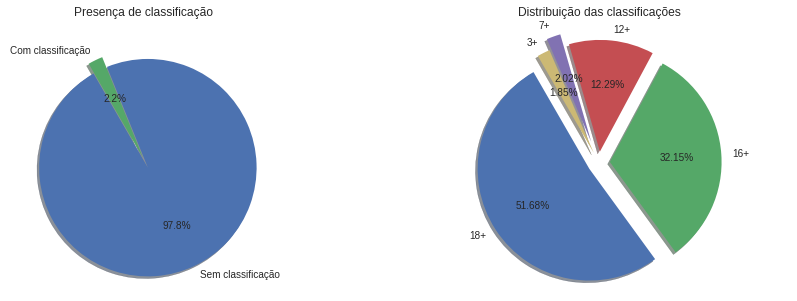

In [151]:
# valores únicos: [ 0 18 16 12  7  3], onde 0 indica que o jogo é livre ou não foi classificado
age = games.required_age.value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

labels = ['Sem classificação', 'Com classificação']
values = age[0], sum(age[1:])
ax1.pie(values, explode=(0.1, 0), labels = labels, autopct = '%1.1f%%', shadow=True, startangle=120)
ax1.title.set_text('Presença de classificação')


labels = ['18+', '16+', '12+', '7+', '3+']
values = age[1:]
ax2.pie(values, explode=(0.1, 0.1, 0.1, 0.2, 0.1), labels = labels, autopct = '%1.2f%%', shadow=True, startangle=120)
ax2.title.set_text('Distribuição das classificações')

plt.axis('equal')
plt.show()

Da distribuição dos dados, pode-se observar que a maioria das entradas (97.8%) encontra-se sem limitação de idade. Já considerando os jogos com classificiação, vemos que mais da metade dos jogos (51.68%) possui uma limitação bem restrita de idade (18+). Isso indica uma forte predominância nas entradas classificados de jogos considerados bastante violentos ou com temática e linguagem inapropriadas mais extremas segundo o padrão do sistema europeu de classificação (PEGI).

### Generos
A próxima análise que podemos fazer se refere aos gêneros mais presentes na loja. Afinal, qual é o gênero mais presente no catálogo? 

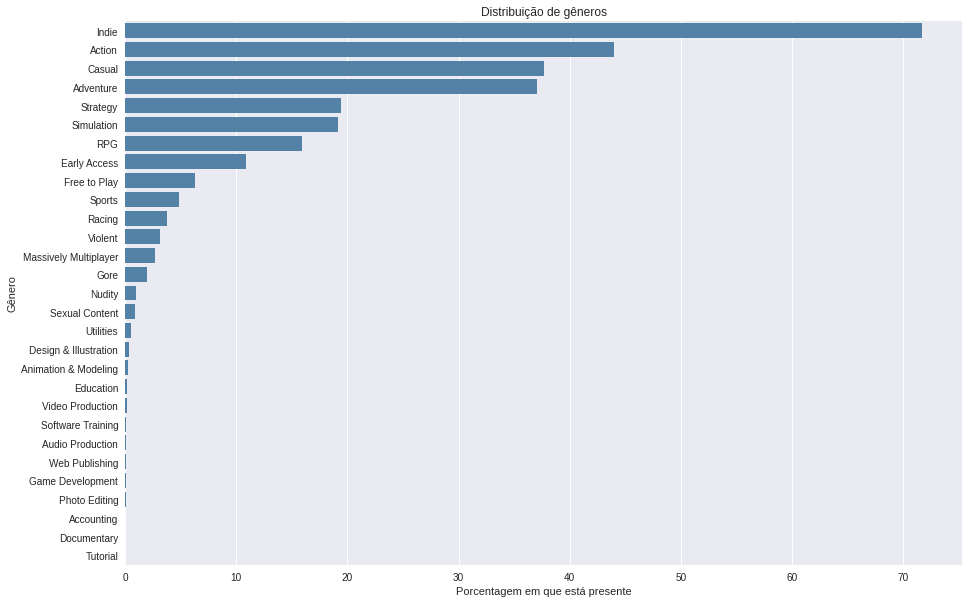

In [400]:
genre_counts = games['genres'].str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=genre_counts.index, x=genre_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição de gêneros')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Gênero')
plt.show()

Do gráfico acima observamos uma presença bastante acentuada do gênero Indie, estando presente em mais de 70% do catálogo da loja e mostrando uma forte presença de pequenos desenvolvedores na loja. Isso explica a grande quantidade de jogos sem uma classificação indicativa como observado no tópico anterior, afinal por serem jogos menores, de pequenos grupos, nem todos foram classificados.  
Após o gênero Indie, os próximos são Ação, Casual e Aventura, indicando uma concentração do esforço dos desenvolvedores e gêneros mais consagrados e abrangentes em relação a público. Um destaque interessante é o gênero de Simulação, que está a frente de gêneros conhecidos como Esportes, Corrida e até mesmo RPG.  
Essa análise, entretanto, considera todos os jogos, independente de classificação indicativa. Como fica então a distribuição de gênero para jogos mais restritos devido ao conteúdo?

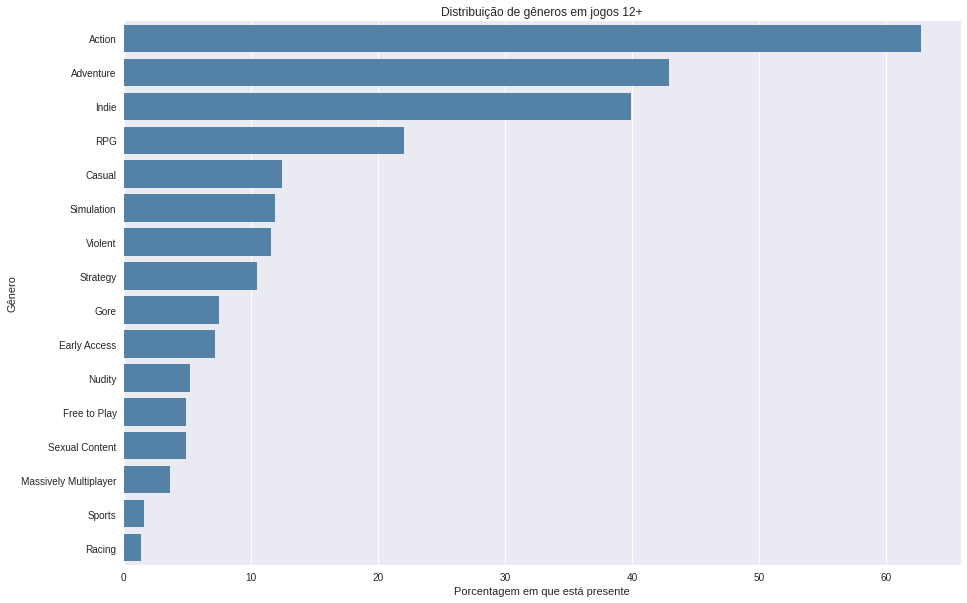

In [401]:
genre_counts = games[games.required_age >= 12].genres.str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=genre_counts.index, x=genre_counts/len(games[games.required_age >= 12])*100, color='SteelBlue')
plt.title('Distribuição de gêneros em jogos 12+')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Gênero')
plt.show()

Confirmando a hipótese anterior, o gênero Indie perde a liderança quando consideramos os jogos que receberam uma classificação indicativa. Nesse subconjunto a liderança pertence ao gênero Ação, seguido de Aventura, com Indie sobrando para terceiro, estando presente em 40% dos jogos.  
Uma coisa interessante a se notar é que, apesar da classificação mais restrita, o gênero Violência representa pouco mais que 10% do catálogo. Com isso podemos inferir que, apesar de serem mais restritos pela presença de violência, isso não é um foco nesses jogos. 

### Categorias
Outra pergunta que podemos nos fazer em relação ao catálogo é quais são os gêneros predominantes na loja.

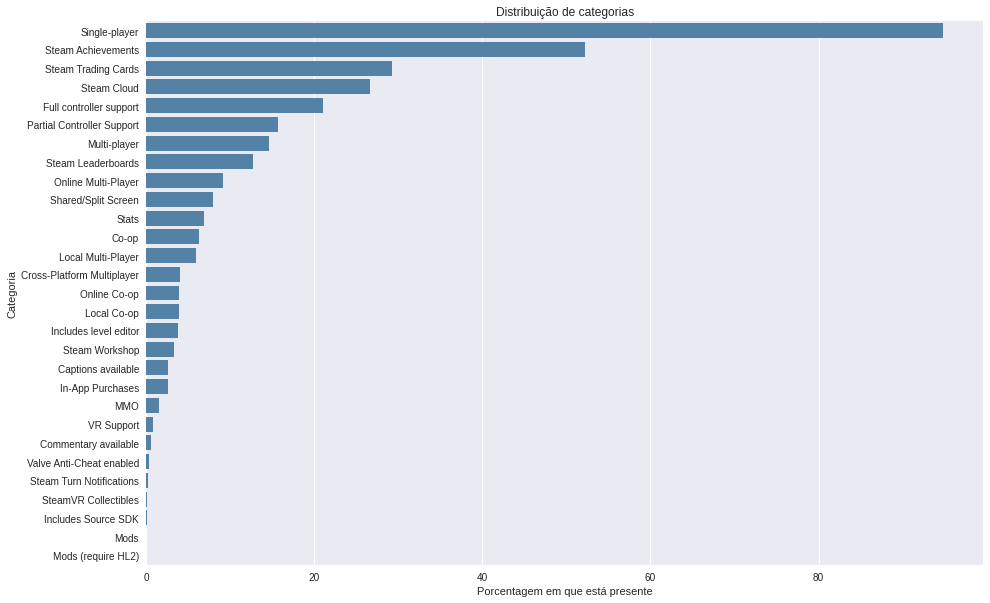

In [256]:
category_counts = games['categories'].str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,10))
ax = sns.barplot(y=category_counts.index, x=category_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição de categorias')
plt.xlabel('Porcentagem em que está presente')
plt.ylabel('Categoria')
plt.show()

Observando o gráfico acima, podemos verificar que a grande maioria dos jogos disponíveis possuem um modo para apenas um jogador (single-player), o que é entendível, uma vez que o gênero predominante no catálogo é de jogos Indies, que costumam ser focados em uma jogabilidade solo e local. Em seguida, as categorias predominantes são referentes a funcionalidades do Steam, sendo elas as conquistas (Steam Achievements), as cartas (Steam trading Cards) e o armazenamento em nuvem da plataforma (Steam Cloud), o que também é esperado.  
As próximas grandes categorias se referem ao suporte de controle e só então o multiplayer aparece, estando presente em menos de 20% do catálogo. 

### Plataformas
Desde 2013, quando lançou um cliente Steam para Linux, a Valve decidiu investir mais no suporte e no aumento do catálogo para sistemas operacionais da família. Mas afinal como é realmente o suporte para os sitemas operacionais fora da família das janelas?

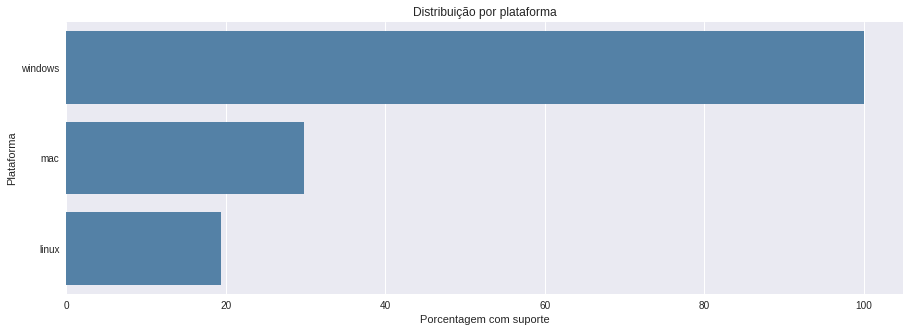

In [406]:
platform_counts = games.platforms.str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(15,5))
ax = sns.barplot(y=platform_counts.index, x=platform_counts/len(games)*100, color='SteelBlue')
plt.title('Distribuição por plataforma')
plt.xlabel('Porcentagem com suporte')
plt.ylabel('Plataforma')
plt.show()

Com aproximadamente 20% do catálogo com suporte para Linux, os sitemas operacionais do pinguim ainda possuem pouca cobertura nativa do catálogo, estando próximo dos cerca de 30% do Mac, mas ainda longe dos quase 100% do Windows. Graças ao Proton desenvolvido pela Valve, entretanto, os jogadores que utilizam Linux podem acessar boa parte do catálogo que não foi disponibilizado pelos desenvolvedores.  
Mas os desenvolvedores não estão adicionando suporte nos novos lançamentos? Como anda a variedade de plataformas dos jogos ao longo do tempo?

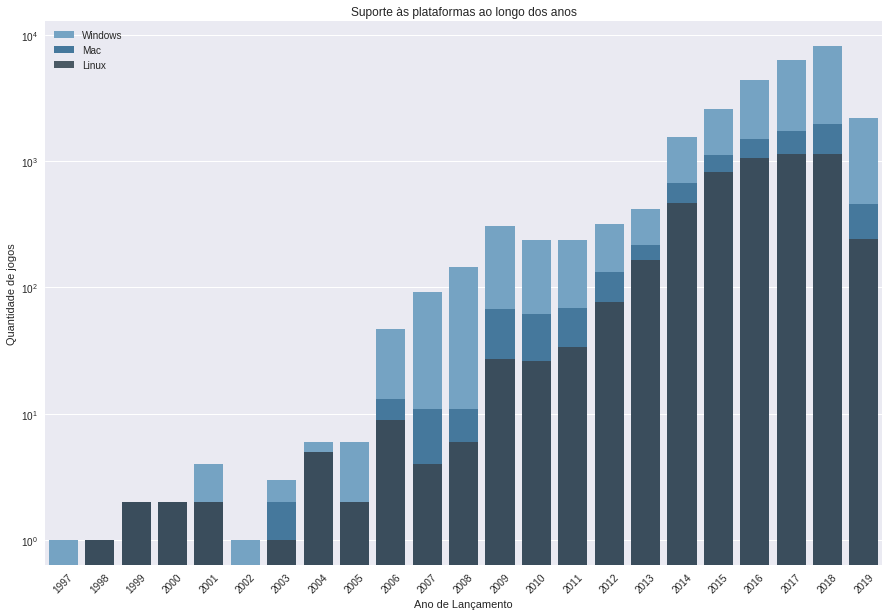

In [420]:
platform_by_year = games.groupby(games.release_date.dt.year.rename('release_year')).agg(
    total=pd.NamedAgg(
        column='platforms',
        aggfunc='count'),
    num_win=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('windows'))),
    num_mac=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('mac'))),
    num_lin=pd.NamedAgg(
        column="platforms", 
        aggfunc=lambda x: sum(x.str.contains('linux')))
)

plt.figure(figsize=(15,10))

g = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_win, color='#68a6d0', label='Windows')
g3 = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_mac, color='#367aab', label='Mac')
g2 = sns.barplot(x=platform_by_year.index, y=platform_by_year.num_lin, color='#344a5a', alpha=0.9, label='Linux')
g.set_yscale('log')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel("Quantidade de jogos")
plt.title('Suporte às plataformas ao longo dos anos')

plt.show()

Observando o gráfico acima, podemos notar o crescimento do suporte às outras plataformas que não o Windows resultante da iniciativa da Valve para atender também os usuários de sistemas operacionais diferentes. Além dos jogos antigos que receberam ports, verificamos também que uma parte considerável dos novos jogos já apresenta suporte para Linux e Mac.

### Desenvolvedoras e Publicadoras

In [ ]:
print('10 maiores publishers na steam\n')
print(games.developer.value_counts().head(10))
print('\n10 desenvolvedores com mais jogos disponíveis na steam\n')
print(games.publisher.value_counts().head(10))

In [ ]:
df = games[['name','publisher','developer','release_date','price']]
df = df[df.publisher.isin(games.publisher.value_counts().head(10).index)]
release_year = []
for s in df.release_date:
    s = s.split('-')[0]
    release_year.append(pd.to_numeric(s))
df['release_date'] = release_year
df = df[['publisher','release_date','price']].groupby(['publisher','release_date'],as_index=False).mean()

In [ ]:
df[df.publisher == '1C Entertainment']

In [ ]:
#graph
for pub in df.publisher.unique():
    k = df[df.publisher == pub]
    plt.plot(k['release_date'],k['price'],'o-',label=pub)

plt.title('Preço Médio no decorrer dos anos \n',fontsize=25)
plt.rcParams['figure.figsize']=(15,10)
plt.ylabel('Price U$\n', fontsize=17)
plt.xticks(df.release_date.unique(),fontsize=17, rotation=45)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

## Avaliação de 3 grandes publishers

### Ubisoft 

In [ ]:
ubi = df_games[df_games["publisher"] == "Ubisoft"]
ubi.head()

#### Plataformas mais utilizadas - Ubisoft

In [ ]:
sns.countplot(ubi.platforms)

####  15 games mais caros da Ubisoft

In [ ]:
ubi.nlargest(15, "price")

In [ ]:
ubi.nlargest(15, "price").price.describe()

In [ ]:
ubi.nlargest(15, "median_playtime")

In [ ]:
ubi.nlargest(15, "median_playtime").price.describe()

#### Visão sobre lançamentos nos anos

In [ ]:
releases = ubi.release_date

In [ ]:
for line, dates in enumerate(releases):
    releases.iloc[line] = releases.iloc[line][:4]

In [ ]:
plt.figure(figsize = (16,5))
sns.countplot(releases)

#### Visão sobre vendas

In [ ]:
ubi.owners.unique()

In [ ]:
# plt.figure(figsize = (16,5))
# sns.countplot(ubi.owners)
ordenar

In [ ]:
ubi[ubi["owners"] == "5000000-10000000"]

In [ ]:
ubi[ubi["owners"] == "10000000-20000000"]

In [ ]:
ubi[ubi["owners"] == "10000000-20000000"]

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(ubi.price, ubi.positive_ratings, color = "blue")
sns.scatterplot(ubi.price, ubi.negative_ratings, color = "red")


#### Verificação de Correlação de atributos

In [ ]:
sns.pairplot(ubi)

# Conclusões

1 - Usar markdown
2 - Fazer analises para as 4 empresas
3 - Verificar date do dataframe
4 - Nao colorir o graf temporal para uma empresa
